# Aprendizaje Automático - Práctica 3 - Aprendizaje Profundo

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 9 de Junio de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Pablo Gálvez Ortigosa</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, dos Notebooks de Colab (uno con cada ejercicio). No de debe entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- __El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.__

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'> En esta práctica se pretenden abordar algunos elementos básicos relativos al aprendizaje profundo utilizando Keras (https://keras.io/). Para ello, se emplean dos tareas del ámbito del procesado de imágenes y visión por computador: clasificación de imágenes (_image classification_) y eliminación de ruido en imágenes (_image denoising_). Para tener un conocimiento más profundo de algunas de estas tareas y métodos, así como familiarizarse con modelos más avanzados, se emplaza al estudiantado a cursar Visión por Computador (asignatura de 4º curso).

# <font color='blue'>Ejercicio 1: PROBLEMA DE CLASIFICACIÓN DE IMÁGENES USANDO REDES CONVOLUCIONALES PROFUNDAS Y COMPARACIÓN CON TÉCNICAS CLÁSICAS DE APRENDIZAJE AUTOMÁTICO (7 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación de imágenes. Más concretamente, se enfrentarán al problema de clasificación de imágenes denominado $\textit{MNIST}$ (https://en.wikipedia.org/wiki/MNIST_database), que incluye dígitos manuscritos. Como consecuencia, este conjunto de datos contiene información sobre 10 clases de imágenes (dígitos del $0$ al $9$).

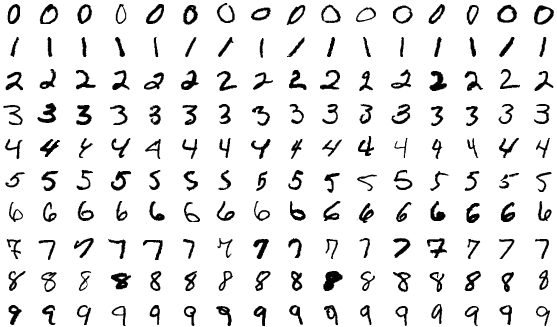



<font color='blue'> Este ejercicio consta de tres apartados:


1.   Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5.
2.   Implementación y experimentación con características HOG y SVMs. Comparación de los resultados proporcionados por esta aproximación clásica con los proporcionados por aprendizaje profundo.
3.   Implementación y experimentación con el modelo profundo que quieran implementar o emplear los estudiantes.



## <font color='blue'> Apartado 1. Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5 (3 puntos)

<font color='blue'> [LeNet5](https://en.wikipedia.org/wiki/LeNet) fue una de las primeras redes convolucionales, y se empleó exitosamente ya en los años 90 en la clasificación de dígitos manuscritos. Véase, por ejemplo, _LeCun et al. (1998). Gradient based learning applied to document recognition. Proceedings of the IEEE. 86(11): 2278-2324_.

<font color='blue'> En este ejercicio emplearemos una versión ligeramente modificada de la misma, que consta de las siguientes capas:

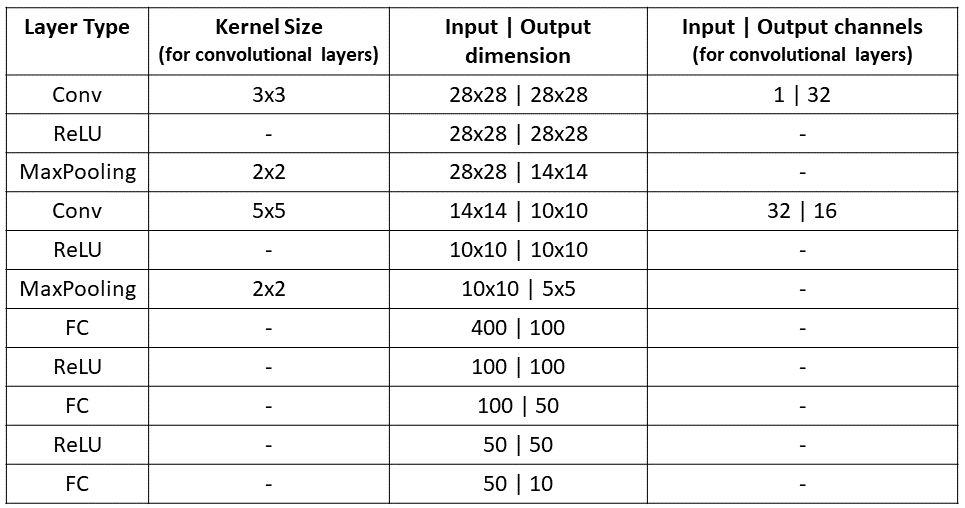

<font color='blue'> A continuación, el alumnado debe implementar en Keras esta arquitectura, y entrenarla y validarla con el conjunto de datos MNIST (ya disponible entre los conjuntos de datos por defecto en Keras: https://keras.io/api/datasets/). A la hora de entrenar modelos profundos es importante acordarse de configurar el cuaderno de modo que se ejecute en GPU (`Editar - Configuración del Cuaderno - Acelerador por Hardware`). De lo contrario, los entrenamientos serán innecesariamente lentos.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Establecer la semilla que vamos a utilizar
np.random.seed(42)

from tensorflow import keras

#import keras
!pip install np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, ReLU
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# NÚMERO DE CLASES
num_classes = 10


# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=bfa136e0ffed9ee10950168691ed695ddba77f4c15405202e6b50483aba4dbdf
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


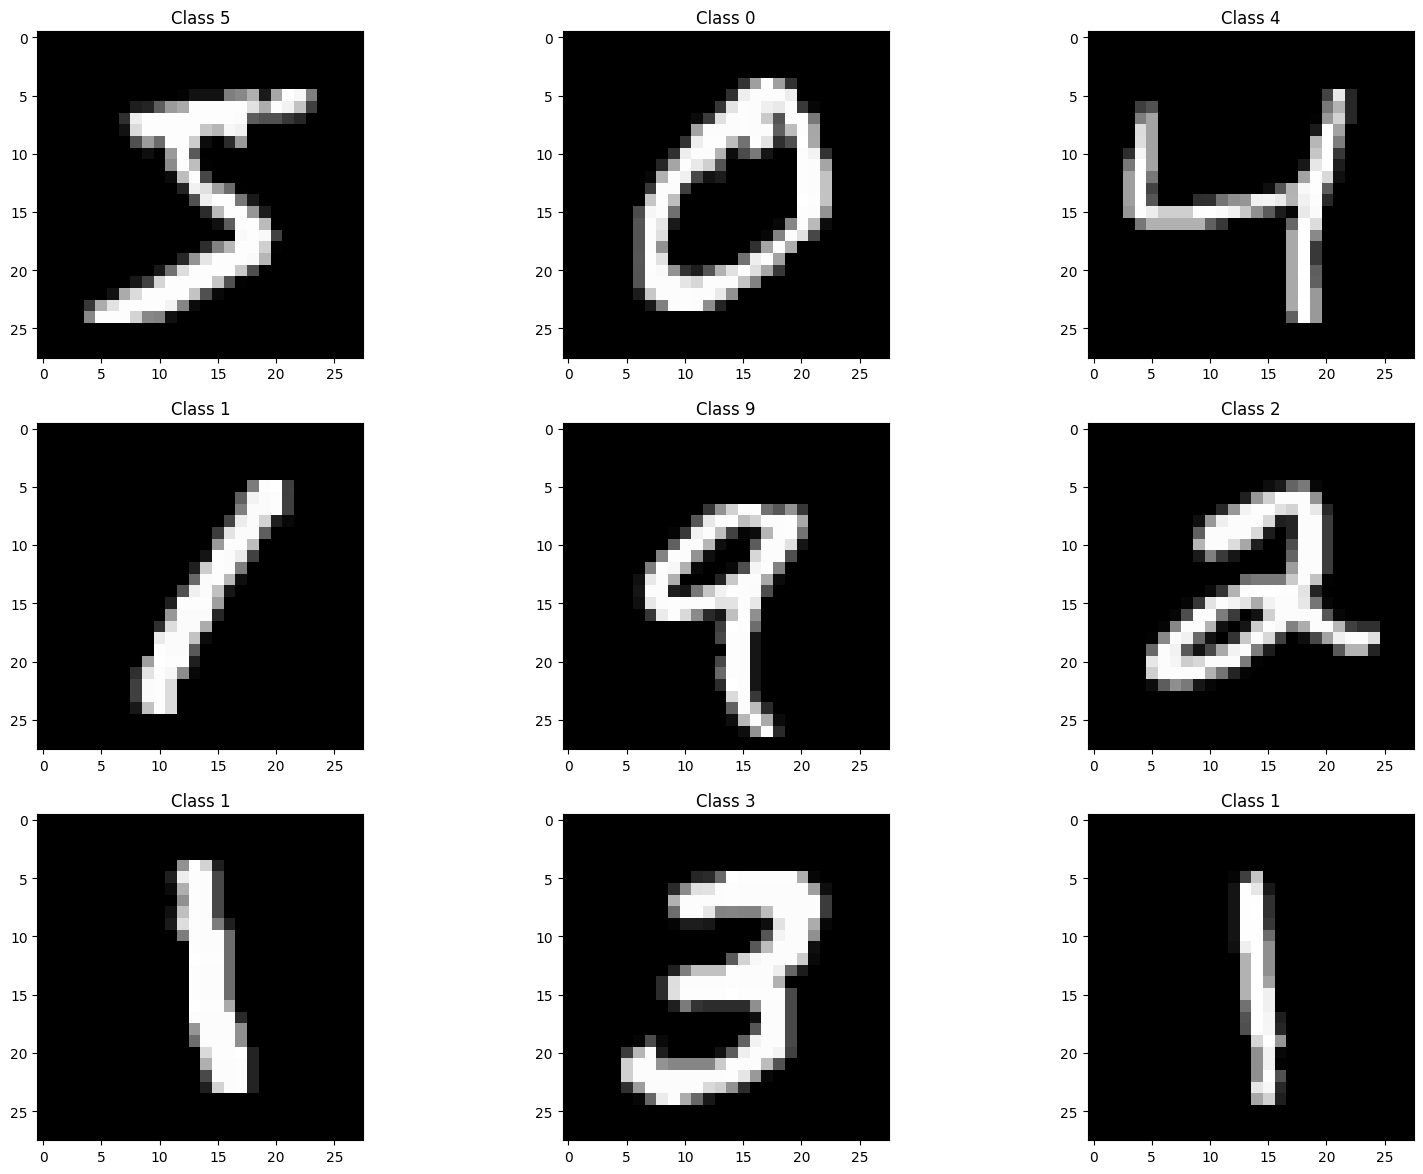

In [2]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

Comprobamos si las clases están balanceadas:

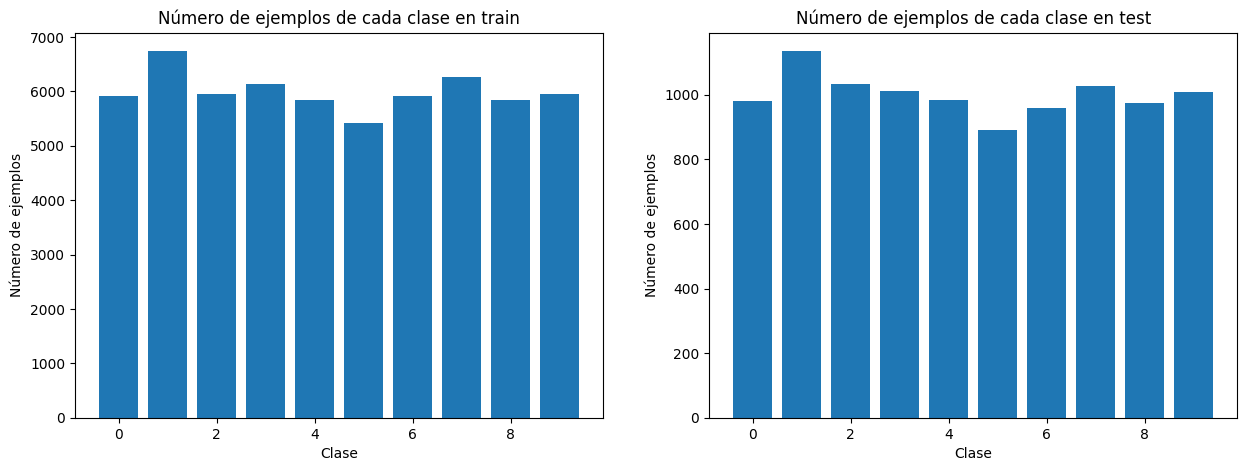

In [3]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

numExamples = np.zeros(10)
for i in range(10):
  numExamples[i] = (len(y_train[y_train[:,i] == 1]))

plt.xlabel("Clase")
plt.ylabel("Número de ejemplos")
plt.title("Número de ejemplos de cada clase en train")

plt.bar(range(10), numExamples)


plt.subplot(1,2,2)

for i in range(10):
  numExamples[i] = (len(y_test[y_test[:,i] == 1]))

plt.xlabel("Clase")
plt.ylabel("Número de ejemplos")
plt.title("Número de ejemplos de cada clase en test")

plt.bar(range(10), numExamples)

plt.show()

Concluimos que las clases están bastante balanceadas, tanto en el entrenamiento como en validación.

<font color='blue'> El alumnado debe escoger empíricamente el tamaño de _batch_, el número de épocas y el _learning rate_. Se debe documentar en detalle todo el proceso de entrenamiento y selección de hiperparámetros (incluyendo qué metricas y función de pérdida se emplean y por qué). Se debe emplear _early stopping_ (https://keras.io/api/callbacks/early_stopping/), y los alumnos deben explicar en qué consiste este proceso de regularización. Se puede emplear tanto _hold-out_ como _cross-validation_ como protocolo de validación experimental pero, en cualquier caso, se deben explicar y justificar adecuadamente todas las decisiones tomadas. Se debe dejar un $20\%$ de los datos de entrenamiento para validación. Finalmente, se debe comparar el rendimiento obtenido con dos optimizadores: AdamW y Adadelta.

<font color='blue'> Resulta fundamental realizar un _.summary()_ del modelo creado y demostrar que se comprenden los distintos elementos que allí aparecen: nombre/tipo de capa, dimensiones de salida, y número de parámetros de la red.

In [4]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelve la
# función fit()).
def mostrarEvolucion(hist, plot_accuracy=True):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

    if (plot_accuracy):
      acc = hist.history['accuracy']
      val_acc = hist.history['val_accuracy']
      plt.plot(acc)
      plt.plot(val_acc)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend(['Training accuracy','Validation accuracy'])
      plt.show()


In [5]:
# Esta función devuelve la accuracy de un modelo,
# definida como el porcentaje de etiquetas bien predichas
# frente al total de etiquetas. Como parámetros es
# necesario pasarle el vector de etiquetas verdaderas
# y el vector de etiquetas predichas, en el formato de
# keras (matrices donde cada etiqueta ocupa una fila,
# con un 1 en la posición de la clase a la que pertenece y un 0 en las demás).
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy


### Construcción del modelo:

Creamos la red con las capas pedidas:

In [6]:
#A CUBRIR POR EL ALUMNADO
model = Sequential()

# Primera capa convolucional con ReLU
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=[28, 28, 1]))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), input_shape=(28, 28, 1)))

# Segunda capa convolucional con ReLU
model.add(Conv2D(16, kernel_size=(5, 5), input_shape=[14, 14,]))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2), input_shape=[10, 10,]))

# Aplanar antes de las capas densas
model.add(Flatten())

# Primera capa densa con ReLU
model.add(Dense(100))
model.add(ReLU())

# Segunda capa densa con ReLU
model.add(Dense(50))
model.add(ReLU())

# Capa de salida
model.add(Dense(10, activation = 'softmax'))

# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 re_lu (ReLU)                (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        12816     
                                                                 
 re_lu_1 (ReLU)              (None, 10, 10, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                   

Las capas que tienen como prefijo `conv2d` son las capas convolucionales. Se han incluido las capas `re_lu` por separado, pero serían equivalente a incluir en la capa anterior `activation = relu`.

Se muestra también la salida de cada capa (`None` refiere a `batch_size`, que puede ser cualquiera). También se muestran los parámetros que se pueden entrenar en cada capa (dependerá del tamaño de kernel, por ejemplo, en la primera sería $3\cdot 3 \cdot 32 + 32 = 320$). Las capas de activación y de `max_pooling` no tendrán parámetros a entrenar.

Las dimensiones de salida son `(batch_size, altura, anchura, canales)`.
El parámetro `padding = 'same'` nos permite mantener las dimensiones de entrada en la salida. Mientras que las capas `max_pooling2d` disminuyen a la mitad la altura y la anchura.

La última capa tendrá la función de activación `softmax`, ya que se trata de un problema de clasificación multiclase.

### Ajuste de hiperparámetros del modelo básico:

Para el ajuste de hiperparámetros, una posible opción sería utilizar `keras-tuner`. Sin embargo, `keras-tuner` escribe en disco, por lo que optaremos por no utilizarlo. Aun así, se ha hecho un experimento, y un posible ejemplo de utilización para determinar la mejor tasa de aprendizaje sería el siguiente:

![keras-tuner](https://drive.google.com/uc?export=view&id=1Gj3XPrqBY27DGWT69PZMy2yqXXVhTVGe)

Elegiremos los hiperparámetros probando directamente varias opciones. En concreto, los hiperparámetros en los que nos centraremos serán:

*   **Learning rate:** Probaremos varias opciones, comenzaremos por un learning rate muy reducido, y iremos aumentándolo hasta obtener buenos resultados, en el 20% del training set que usaremos como validación
*  **Tamaño de batch:** Determinará en gran medida la rapidez con la que se entrena la red. Probaremos con un valor elevado, como 128, y en caso de que se obtuvieran diferencias elevadas entre training y validación, se reduciría.
* **Número de épocas:** Para elegir los hiperparámetros, elegiremos un valor reducido para comprobar qué modelos son mejores entrenando un número de épocas reducido, agilizando así los cálculos en gran medida. Una vez elegido el modelo final, elegiremos un valor muy elevado para el número de épocas, y utilizaremos early-stopping, es decir, cuando una cierta métrica en validación (generalmente val-loss) no se reduzca, se detendrá (tras un cierto número de épocas, que determinaremos usando el parámetro patience).

En todos los casos, usaremos como métrica de validación, por ser un problema de clasificación con clases bastante balanceadas, la métrica más común en estos casos, *accuracy*.




In [8]:
learning_rates = [0.03, 0.3, 1]

for i in learning_rates:
      learning_rate = i
      print(f'Learning rate = {i}')

      # Optimizador más básico para especificar learning_rate
      optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

      # Clonamos el modelo creado anteriormente
      modelo = keras.models.clone_model(model)

      modelo.compile(loss="categorical_crossentropy", optimizer=optimizer,
                    metrics=["accuracy"])

      modelo.fit(x_train, y_train, batch_size=128, epochs = 5, validation_split=0.2)

Learning rate = 0.03
Epoch 1/5
375/375 [==============================] - 6s 6ms/step - loss: 0.8889 - accuracy: 0.7197 - val_loss: 0.2410 - val_accuracy: 0.9237
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1911 - accuracy: 0.9407 - val_loss: 0.1424 - val_accuracy: 0.9560
Epoch 3/5
375/375 [==============================] - 2s 6ms/step - loss: 0.1272 - accuracy: 0.9606 - val_loss: 0.1049 - val_accuracy: 0.9668
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1002 - accuracy: 0.9689 - val_loss: 0.1009 - val_accuracy: 0.9668
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0837 - accuracy: 0.9744 - val_loss: 0.0800 - val_accuracy: 0.9750
Learning rate = 0.3
Epoch 1/5
375/375 [==============================] - 3s 6ms/step - loss: 0.4001 - accuracy: 0.8694 - val_loss: 0.0825 - val_accuracy: 0.9728
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0751 - accuracy: 0.9763 - val_loss: 0.

Concluimos que el mejor learning rate es 0.3, ya que es el valor para el que se obtiene menor loss en evaluación, y mayor accuracy en evaluación.

Elegimos ahora dicho modelo, y lo entrenamos utilizando early-stopping (pararemos tras 2 épocas sin disminuir la métrica validation-loss). Utilizaremos `restore_best_weights=True` para recuperar el mejor modelo obtenido:

In [9]:
best_model = keras.models.clone_model(model)

optimizer = keras.optimizers.SGD(learning_rate=0.3)
best_model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

# Nos quedamos con los pesos de la mejor época (con respecto a validación)
early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = best_model.fit(x_train, y_train, batch_size=128, epochs = 20, callbacks = [early_stop], validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.7013 - accuracy: 0.7662 - val_loss: 0.1512 - val_accuracy: 0.9542
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1389 - accuracy: 0.9565 - val_loss: 0.1670 - val_accuracy: 0.9506
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1011 - accuracy: 0.9684 - val_loss: 0.0959 - val_accuracy: 0.9733
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0801 - accuracy: 0.9751 - val_loss: 0.0852 - val_accuracy: 0.9752
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0730 - accuracy: 0.9773 - val_loss: 0.0788 - val_accuracy: 0.9781
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.0733 - val_accuracy: 0.9800
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0539 - accuracy: 0.9822 - val_loss: 0.0809 - val_accuracy: 0.9762
Epoch 

Veamos ahora en una gráfica cómo va variando tanto el training/validation loss, como la precisión tanto en training como en validación:

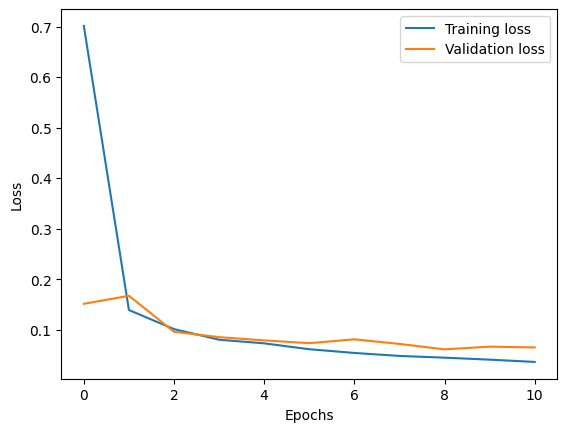

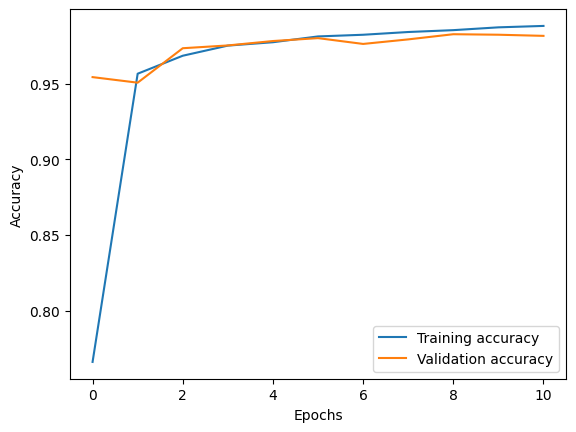

In [10]:
mostrarEvolucion(history)

Vemos que el training accuracy va subiendo en cada época (y loss bajando), pero llega un momento donde al conjunto de validación no le ocurre lo mismo. Ese es el momento en el que nos detenemos, y el modelo con el que nos quedamos.

Sorprende que al principio del entrenamiento el error en training es mucho mayor que el error en validación, aunque ello se debe a la forma de calcular ambos en keras (ver Figura 10-11 en libro de A. Geron).

In [11]:
preds = best_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
calcularAccuracy(y_test, preds)

0.9838

Comprobamos que se obtiene un modelo prácticamente perfecto, con más del 98% de acierto.

### Probando AdamW

Probaremos ahora el optimizador AdamW. El proceso de ajuste de parámetros será completamente análogo al anterior:

In [13]:
learning_rates = [0.003, 0.03, 0.3]

for i in learning_rates:
      learning_rate = i
      print(f'Learning rate = {i}')

      # Optimizador más básico para especificar learning_rate
      optimizer = keras.optimizers.AdamW(learning_rate=learning_rate)

      # Clonamos el modelo creado anteriormente
      modelo = keras.models.clone_model(model)

      modelo.compile(loss="categorical_crossentropy", optimizer=optimizer,
                    metrics=["accuracy"])

      modelo.fit(x_train, y_train, batch_size=128, epochs = 5, validation_split=0.2)

Learning rate = 0.003
Epoch 1/5
375/375 [==============================] - 5s 6ms/step - loss: 0.1965 - accuracy: 0.9388 - val_loss: 0.0687 - val_accuracy: 0.9788
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0553 - val_accuracy: 0.9837
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0424 - accuracy: 0.9863 - val_loss: 0.0431 - val_accuracy: 0.9877
Epoch 4/5
375/375 [==============================] - 3s 8ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0471 - val_accuracy: 0.9867
Epoch 5/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0661 - val_accuracy: 0.9798
Learning rate = 0.03
Epoch 1/5
375/375 [==============================] - 4s 7ms/step - loss: 2.3173 - accuracy: 0.1085 - val_loss: 2.3041 - val_accuracy: 0.1060
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 2.3029 - accuracy: 0.1099 - val_loss:

El mejor modelo, es en este, caso, cuando la tasa de aprendizaje es 0.003. Entrenamos ese modelo utilizando EarlyStopping:

In [14]:
model_adamw = keras.models.clone_model(model)

optimizer = keras.optimizers.AdamW(learning_rate=0.003)
model_adamw.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model_adamw.fit(x_train, y_train, batch_size=128, epochs = 20, callbacks = [early_stop], validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 0.2104 - accuracy: 0.9346 - val_loss: 0.0627 - val_accuracy: 0.9796
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0510 - val_accuracy: 0.9856
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0415 - accuracy: 0.9865 - val_loss: 0.0447 - val_accuracy: 0.9862
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0436 - val_accuracy: 0.9865
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0464 - val_accuracy: 0.9864
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0533 - val_accuracy: 0.9848


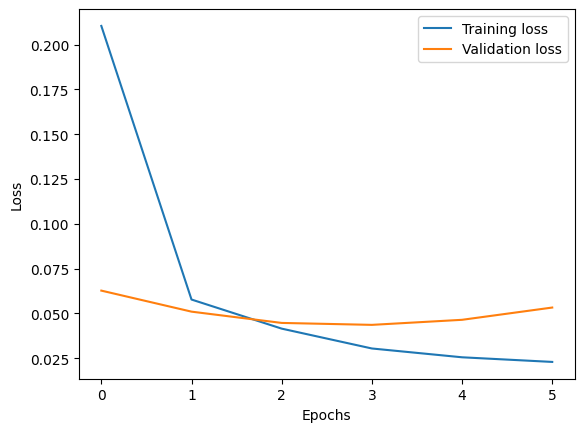

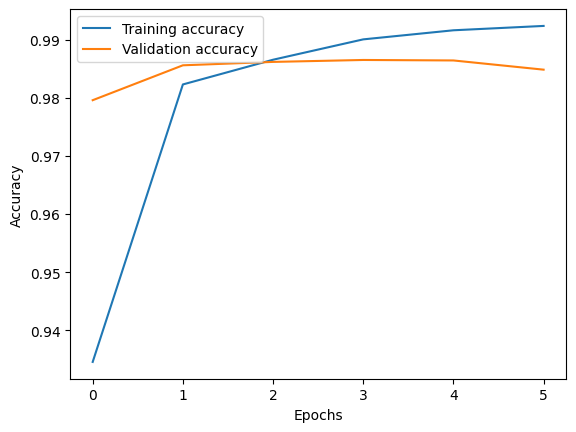

In [15]:
mostrarEvolucion(history)

Vuelve a ocurrir lo mismo que en el caso anterior. De nuevo nos detenemos cuando el error en validación comienza a aumentar.

In [16]:
preds = model_adamw.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
calcularAccuracy(y_test, preds)

0.9869

El modelo mostraba una ligera mejoría al entrenarlo respecto a no usar optimizadores, y ahora en el conjunto de validación muestra una pequeña mejora, aunque es muy reducida.

### Probando AdaDelta

Por último, probamos a utilizar AdaDelta como optimizador:

In [18]:
learning_rates = [1, 3, 4, 5]

for i in learning_rates:
      learning_rate = i
      print(f'Learning rate = {i}')

      # Optimizador más básico para especificar learning_rate
      optimizer = keras.optimizers.Adadelta(learning_rate=learning_rate)

      # Clonamos el modelo creado anteriormente
      modelo = keras.models.clone_model(model)

      modelo.compile(loss="categorical_crossentropy", optimizer=optimizer,
                    metrics=["accuracy"])

      modelo.fit(x_train, y_train, batch_size=128, epochs = 5, validation_split=0.2)

Learning rate = 1
Epoch 1/5
375/375 [==============================] - 4s 7ms/step - loss: 0.3036 - accuracy: 0.9075 - val_loss: 0.0932 - val_accuracy: 0.9728
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0733 - accuracy: 0.9773 - val_loss: 0.0835 - val_accuracy: 0.9759
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0459 - val_accuracy: 0.9866
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0497 - val_accuracy: 0.9845
Epoch 5/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0419 - val_accuracy: 0.9877
Learning rate = 3
Epoch 1/5
375/375 [==============================] - 3s 5ms/step - loss: 0.2455 - accuracy: 0.9245 - val_loss: 0.0716 - val_accuracy: 0.9772
Epoch 2/5
375/375 [==============================] - 2s 6ms/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0472 

Los resultados en este caso son muy similares entre 3 y 4, pero nos quedaremos con el valor 3, ya que en es el obtiene ligeramente el mejor val_loss y la mejor accuracy.

In [19]:
model_adadelta = keras.models.clone_model(model)

optimizer = keras.optimizers.Adadelta(learning_rate=3)
model_adadelta.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model_adadelta.fit(x_train, y_train, batch_size=128, epochs = 20, callbacks = [early_stop], validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.2335 - accuracy: 0.9256 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0498 - val_accuracy: 0.9858
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.0397 - val_accuracy: 0.9895
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0458 - val_accuracy: 0.9874
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0407 - val_accuracy: 0.9906


Los resultados en este caso parecen ser ligeramente mejores que los anteriores.

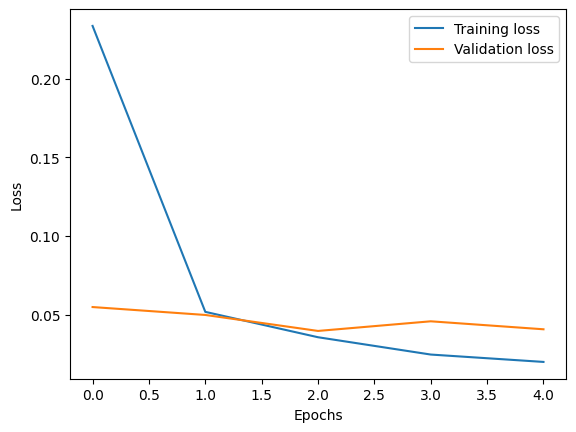

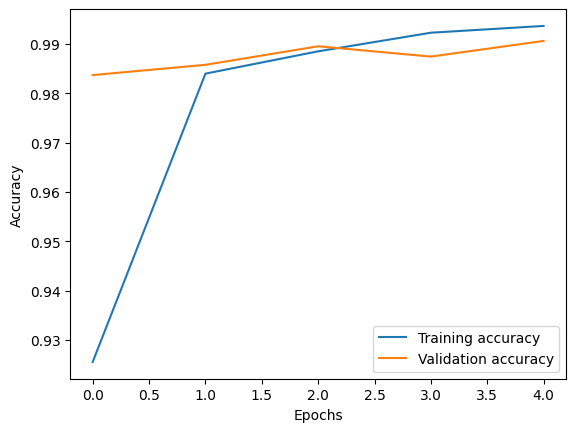

In [20]:
mostrarEvolucion(history)

Finalmente, evaluamos el funcionamiento del modelo:

In [21]:
preds = model_adadelta.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
calcularAccuracy(y_test, preds)

0.991

Obtenemos que el modelo es algo mejor que usando AdamW.

Podemos concluir que la clasificación está ya prácticamente saturada, ya que prácticamente se clasifican todos los ejemplos correctamente.

## <font color='blue'> Apartado 2. Implementación y experimentación con técnicas clásicas (características HOG y SVMs) (2 puntos)

<font color='blue'> Ahora vamos a emplear SVM y características de HOG para clasificar estas imágenes. Se debe describir todo el proceso de ajuste realizado, incluyendo la selección de hiperparámetros, y se deben discutir las ventajas y desventajas de esta aproximación en comparación con el uso de _deep learning_, así como los resultados obtenidos y la calidad de las características empleadas.

In [23]:
from skimage.feature import hog

fd = hog(x_train[0], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

x_train_HOG = np.zeros((x_train.shape[0],len(fd)), np.float32)
x_test_HOG = np.zeros((x_test.shape[0],len(fd)), np.float32)

for i in range(x_train.shape[0]):
  x_train_HOG[i] = hog(x_train[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)
for i in range(x_test.shape[0]):
  x_test_HOG[i] = hog(x_test[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

In [24]:
print(x_train_HOG.shape)

(60000, 16)


HOG o Histogram Oriented Gradients es un descriptor clásico de características que se centra en la forma y estructura de los objetos dentro de las imágenes.

En general, la gran ventaja será que, computacionalmente será bastante más ligero que una red neuronal. Sin embargo, al ser datos de tipo imágenes, las redes convolucionales obtendrán mejores resultados, por lo que no debemos esperar superar a las redes implementadas en el punto anterior.

Para entrenar los modelos nos viene bien ahora tener las clases en forma de etiqueta, por lo que pasamos de vectores a etiquetas de nuevo:

In [25]:
y_train_HOG = np.array([np.where(r==1)[0][0] for r in y_train])
y_test_HOG = np.array([np.where(r==1)[0][0] for r in y_test])

Seleccionaremos ahora los hiperparámetros de la SVM. Ajustaremos los hiperparámetros más importantes de la SVM, el tipo de kernel y el hiperparámetro de regularización C. Utilizaremos `hold-out` para agilizar los cálculos, dejando el 20% de los datos de entrenamiento para validación:

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(x_train_HOG, y_train_HOG):
  x_train_HOG_part, x_val_HOG = x_train_HOG[train_index], x_train_HOG[test_index]
  y_train_HOG_part, y_val_HOG = y_train_HOG[train_index], y_train_HOG[test_index]

In [27]:
from sklearn.svm import SVC

C = [0.1, 1, 10]
kernel = ['rbf', 'poly']

for c in C:
  for ker in kernel:
    print(f'C = {c}, Kernel = {ker}')
    svm = SVC(kernel = ker, C = c, random_state = 42).fit(x_train_HOG_part, y_train_HOG_part)
    print(f'Accuracy = {svm.score(x_val_HOG, y_val_HOG)}')

C = 0.1, Kernel = rbf
Accuracy = 0.8243333333333334
C = 0.1, Kernel = poly
Accuracy = 0.8409166666666666
C = 1, Kernel = rbf
Accuracy = 0.8485
C = 1, Kernel = poly
Accuracy = 0.8568333333333333
C = 10, Kernel = rbf
Accuracy = 0.8625
C = 10, Kernel = poly
Accuracy = 0.8603333333333333


Nos quedamos, por tanto, con $C=10$ y kernel RBF.
Entrenamos ahora con todo el conjunto y comprobamos su funcionamiento:

In [28]:
# A CUBRIR POR EL ALUMNADO
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm = SVC(kernel = 'rbf', C = 10, random_state=42).fit(x_train_HOG, y_train_HOG)
svm_predictions = svm.predict(x_test_HOG)
accuracy = svm.score(x_test_HOG, y_test_HOG)
cm = confusion_matrix(y_test_HOG, svm_predictions)

In [29]:
accuracy

0.8645

Comprobamos que el modelo no obtiene resultados tan buenos como las redes anteriores, pero no obtiene un mal resultado (> 85%), y el entrenamiento ha sido bastante menos costoso que en el caso de las redes neuronales.

En general, las CNNs suelen obtener mejores resultados, ya que extraen automáticamente las características más importantes de las imágenes. Sin embargo, en conjuntos donde existan pocas imágenes, pueden llegar a ser superados por HOG+SVM (aunque con data augmentation, se solucionaría).

Podemos comparar ahora ligeramente algunos ejemplos en los que se equivocan las redes y/o la SVM.

Comenzamos viendo las matrices de confusión de ambos modelos. La de la SVM sería:

In [30]:
cm

array([[ 873,    5,   19,    1,    3,   11,   19,    2,   32,   15],
       [   5, 1110,    2,    4,    4,    0,    6,    0,    4,    0],
       [  16,    2,  873,   45,    9,   11,    2,   35,   32,    7],
       [   4,    0,   38,  871,    0,   26,    1,   23,   36,   11],
       [   3,    3,    6,    1,  892,    3,   58,    1,    8,    7],
       [   7,    4,    7,   30,    7,  739,   15,    5,   59,   19],
       [  30,    3,    1,    1,   53,    9,  847,    0,   11,    3],
       [  18,    3,   53,   55,    3,    4,    0,  873,    7,   12],
       [  57,    1,   20,   62,    9,   45,   21,    6,  694,   59],
       [  12,    4,    3,   10,    6,   23,   10,   13,   55,  873]])

Como vemos, aunque clasifica la gran mayoría de números de forma correcta, comete varios fallos. Estos errores aumentan en los números 7,8 y 9, que los confunde bastante con otros números.

In [31]:
preds = model_adadelta.predict(x_test)

y_test_aux = np.array([np.where(r==1)[0][0] for r in y_test])
preds_aux  = np.argmax(preds, axis = 1)

confusion_matrix(y_test_aux, preds_aux)

313/313 [==============================] - 1s 2ms/step


array([[ 975,    1,    0,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1131,    1,    2,    0,    0,    0,    1,    0,    0],
       [   1,    3, 1026,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    1, 1005,    0,    2,    0,    1,    1,    0],
       [   0,    0,    0,    0,  976,    0,    0,    0,    0,    6],
       [   2,    0,    0,    7,    0,  880,    1,    0,    0,    2],
       [   3,    2,    0,    0,    1,    9,  942,    0,    1,    0],
       [   0,    1,    9,    2,    0,    0,    0, 1014,    0,    2],
       [   3,    0,    2,    1,    1,    3,    0,    1,  961,    2],
       [   2,    0,    0,    2,    2,    2,    0,    1,    0, 1000]])

La clasificación es prácticamente perfecta. También es en los números más elevados, especialmente en el 9 donde comete los mayores fallos, confundiéndolo con el 4 y 7.

Veamos ya, por mera curiosidad, en imágenes algunos errores de los modelos:

In [32]:
import pandas as pd

df = pd.DataFrame()
df['index'] = range(len(x_test))
df['pred_real'] = y_test_aux
df['pred_cnn'] = preds_aux
df['pred_svm'] = svm_predictions

Veamos primero ejemplos de imágenes en las que falla la SVM y acierta la CNN:

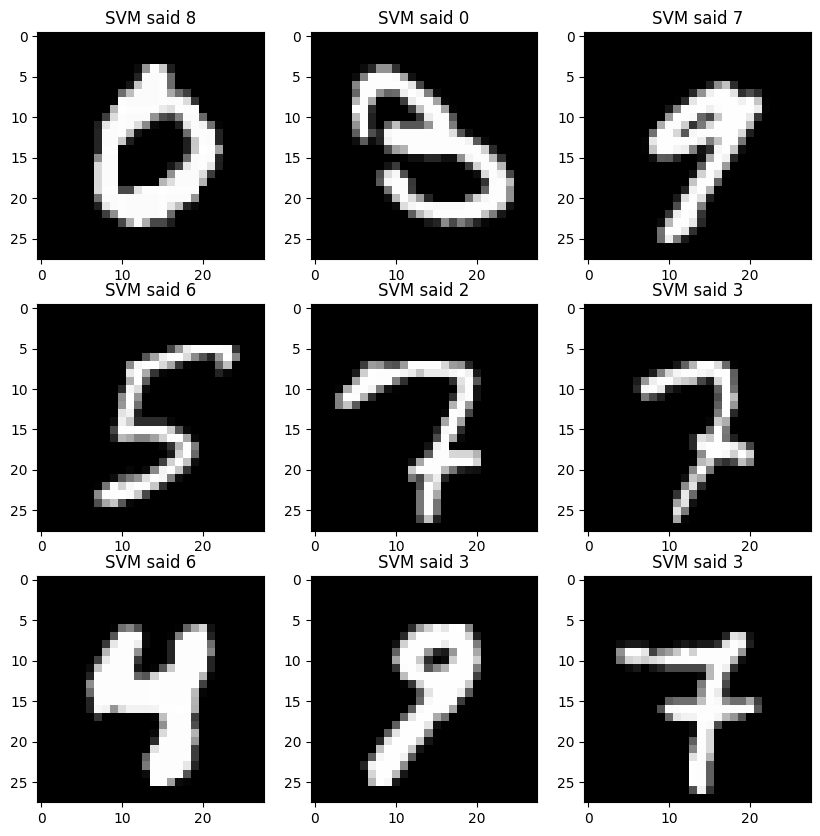

In [33]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure(figsize=(10,10))

df_svm_wrong = df[df['pred_cnn'] == df['pred_real']]
df_svm_wrong = df_svm_wrong[df_svm_wrong['pred_cnn'] != df_svm_wrong['pred_svm']]

for i in range(number_images_per_row* 3 ):
  label = 'SVM said {}'.format(df_svm_wrong.iloc[i]['pred_svm'])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_test[df_svm_wrong.iloc[i]['index']].squeeze(), cmap='gray',vmin=0,vmax=1)

plt.show()

Salvo el 9 de la primera fila que puede llegar ligeramente a confundirse con un 7, el resto de los fallos resultan un tanto inexplicables, ya que el número no se parece en nada a la predicción.

Parece incluso que cuando el número está algo rotado, a la SVM le cuesta mucho identificarlo.

¿Existe algún valor en el que la SVM acierte y la red no lo haga?

In [34]:
df_cnn_wrong = df[df['pred_svm'] == df['pred_real']]
df_cnn_wrong = df_cnn_wrong[df_cnn_wrong['pred_svm'] != df_cnn_wrong['pred_cnn']]
len(df_cnn_wrong)

24

Hay 26 valores en los que esto ocurre. Representémos algunos de ellos:

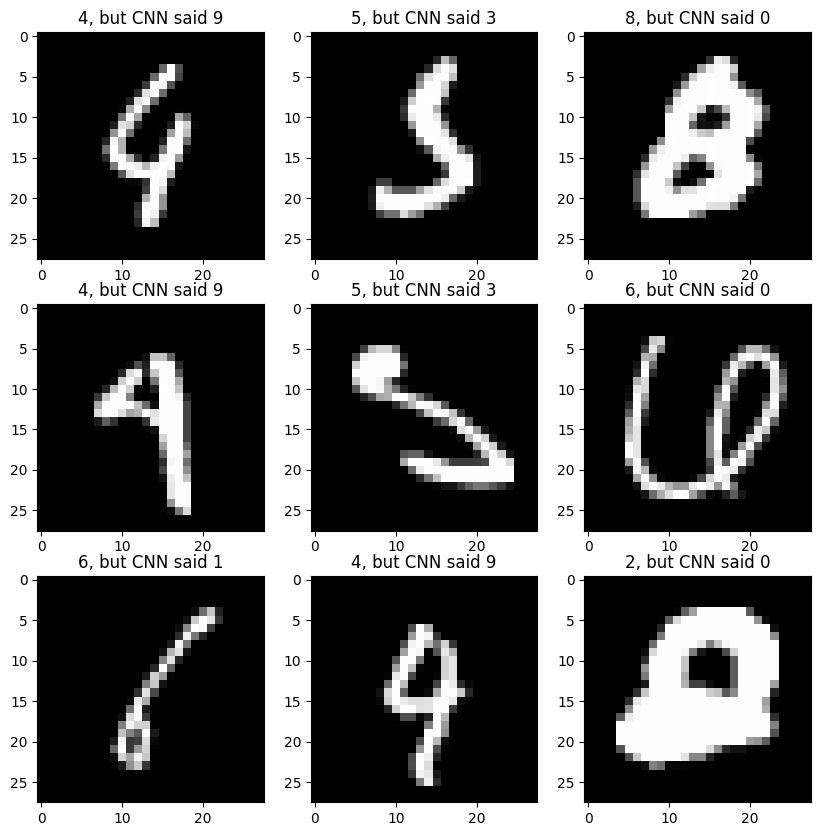

In [35]:
number_images_per_row = 3
fig = plt.figure(figsize=(10,10))

for i in range(number_images_per_row* 3 ):
  label = '{}, but CNN said {}'.format(df_cnn_wrong.iloc[i]['pred_real'],df_cnn_wrong.iloc[i]['pred_cnn'])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_test[df_cnn_wrong.iloc[i]['index']].squeeze(), cmap='gray',vmin=0,vmax=1)

plt.show()

Aquí los fallos son completamente comprensibles y mucho más explicables, incluso se han incluido los números que realmente son, ya que en la mayoría de casos no se sabía con certeza.

Los números que predice la red perfectamente podría decirlos alguien al que le preguntáramos qué número hay en la imagen.

Por último, representamos algunos números en los que no acierta ninguno de los modelos, lo que puede indicarnos, lo difíciles que son de clasificar dichos números:

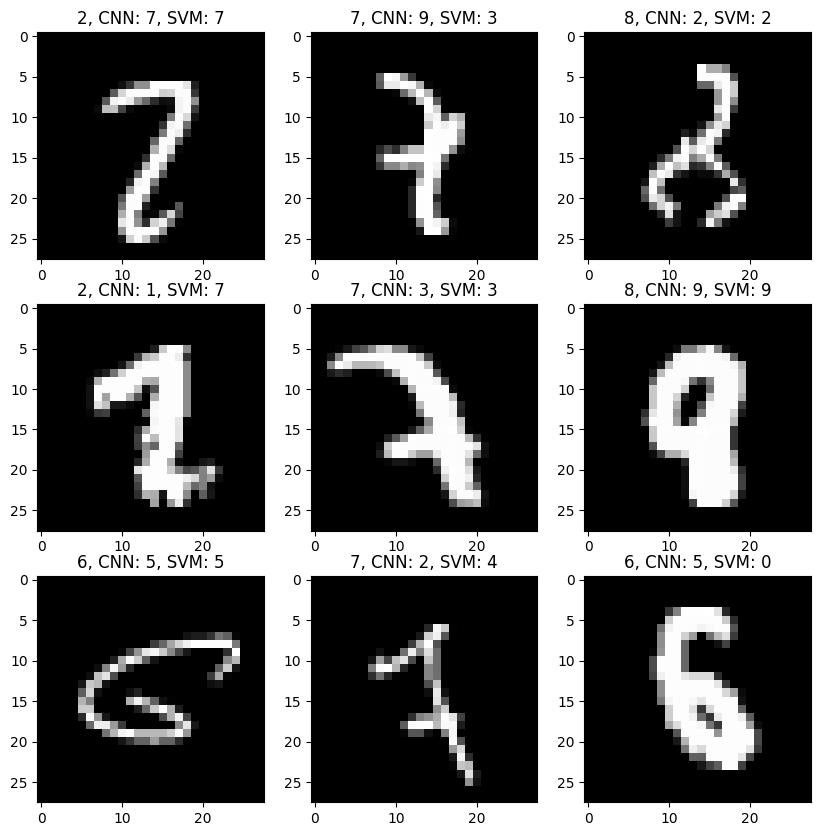

In [36]:
number_images_per_row = 3
fig = plt.figure(figsize=(10,10))

df_all_wrong = df[df['pred_svm'] != df['pred_real']]
df_all_wrong = df_all_wrong[df_all_wrong['pred_cnn'] != df_all_wrong['pred_real']]

for i in range(number_images_per_row* 3 ):
  label = '{}, CNN: {}, SVM: {}'.format(df_all_wrong.iloc[i]['pred_real'],df_all_wrong.iloc[i]['pred_cnn'], df_all_wrong.iloc[i]['pred_svm'])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_test[df_all_wrong.iloc[i]['index']].squeeze(), cmap='gray',vmin=0,vmax=1)

plt.show()

Son número prácticamente imposibles de clasificar, incluso para un humano.

## <font color='blue'> Apartado 3. Implementación y experimentación con uno o más modelos escogidos o diseñados por los estudiantes (2 puntos)

<font color='blue'> En este apartado, los alumnos deben diseñar su propia red neuronal para intentar mejorar los resultados obtenidos hasta el momento. Por ejemplo, se puede incrementar la profundidad de la red, el número o tamaño de los filtros convolucionales a aprender, se puede optar por emplear técnicas de regularización como Dropout o Batch Normalization, estrategias de _data augmentation_ o inicialización de pesos, etc. Queda a su elección la estrategia a seguir aunque, en cualquier caso, se valorará la complejidad de la propuesta realizada así como la calidad de la documentación aportada.

<font color='blue'> Del mismo modo, los estudiantes también pueden incluir una comparativa con el rendimiento de alguna otra técnica clásica de su elección (como Random Forest o Gradient Boosting) junto con vectores de características de su elección (incluyendo la modificación de los hiperparámetros del extractor de HOG usado en el apartado anterior, para lo cual será necesario que los alumnos revisen la documentación al respecto).

<font color='blue'> Dentro de este tercer apartado, en caso de que se haya saturado el rendimiento en MNIST (en el sentido de obtener una _accuracy_ en validación superior al $98\%$), se debe emplear como conjunto de datos $\textit{CIFAR-10}$ (https://archive.ics.uci.edu/dataset/691/cifar+10 y https://www.cs.toronto.edu/~kriz/cifar.html). Este conjunto de datos contiene información sobre 10 clases de imágenes diferentes, y también está incluido directamente en Keras (https://keras.io/api/datasets/):

```
# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
```

Con la red neuronal básica obtuvimos más del $98%$ de accuracy, por lo que pasamos directamente a trabajar con el conjunto $\textit{CIFAR-10}$.

In [37]:
# A CUBRIR POR EL ALUMNADO
# Cargar el conjunto de datos CIFAR-10
cifar10 = keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

170498071/170498071 [==============================] - 13s 0us/step


Preprocesamos ligeramente los datos (esta vez las imágenes son a color):

In [38]:
x_train.shape

(50000, 32, 32, 3)

In [39]:
# NÚMERO DE CLASES
num_classes = 10

# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = x_train.shape[1], x_train.shape[2]

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [40]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Probamos el rendimiento de la red neuronal básica del primer ejercicio en este conjunto de datos. Para ello, cambiamos la primera capa de dicha red, para que espere imágenes en este nuevo formato:

In [41]:
#A CUBRIR POR EL ALUMNADO
model = Sequential()

# Primera capa convolucional con ReLU
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=[32, 32, 3]))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional con ReLU
model.add(Conv2D(16, kernel_size=(5, 5)))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar antes de las capas densas
model.add(Flatten())

# Primera capa densa con ReLU
model.add(Dense(100))
model.add(ReLU())

# Segunda capa densa con ReLU
model.add(Dense(50))
model.add(ReLU())

# Capa de salida
model.add(Dense(10, activation = 'softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 re_lu_4 (ReLU)              (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        12816     
                                                                 
 re_lu_5 (ReLU)              (None, 12, 12, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                 

Entrenamos el modelo:

In [42]:
model_adadelta = keras.models.clone_model(model)

optimizer = keras.optimizers.Adadelta(learning_rate=3)
model_adadelta.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model_adadelta.fit(x_train, y_train, batch_size=128, epochs = 20, callbacks = [early_stop], validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 5s 8ms/step - loss: 1.9469 - accuracy: 0.2874 - val_loss: 1.5388 - val_accuracy: 0.4347
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4584 - accuracy: 0.4770 - val_loss: 1.3331 - val_accuracy: 0.5214
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.2730 - accuracy: 0.5450 - val_loss: 1.3430 - val_accuracy: 0.5232
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1514 - accuracy: 0.5909 - val_loss: 1.3024 - val_accuracy: 0.5563
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0549 - accuracy: 0.6273 - val_loss: 1.1785 - val_accuracy: 0.5910
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 0.9784 - accuracy: 0.6567 - val_loss: 1.1471 - val_accuracy: 0.6030
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 0.9162 - accuracy: 0.6781 - val_loss: 1.1480 - val_accuracy: 0.6088
Epoch 

Se observa cierto overfitting, por lo que intentaremos añadir algún tipo de regularización a la nueva red.

Y calculamos `accuracy` en validación:

In [43]:
preds = model_adadelta.predict(x_test)
calcularAccuracy(y_test, preds)

313/313 [==============================] - 1s 3ms/step


0.6314

En este caso, obtenemos menos de un 70% de acierto, por lo que tenemos, bastante por mejorar.

Implementaremos una red neuronal utilizando la técnica de regularización Dropout. Experimentaremos un poco añadiendo nuevas capas de pooling, distinto número de filtros, y en general, aumentando la complejidad de la red anterior. Intentaremos reducir al máximo las capas densas, para poder entrenar el modelo sin esperar largos tiempos.

De hecho, comenzaremos incluyendo bastantes capas convolucionales, y ninguna densa, para ver si así funciona el modelo:

(Se recomienda en torno a 0.3-0.5 de tasa de Dropout en redes convolucionales, probaremos primero con 0.3 para ver el funcionamiento).

In [44]:
from keras.layers import Dropout, Activation, GlobalAveragePooling2D

#A CUBRIR POR EL ALUMNADO
model = Sequential()

# Primera capa convolucional con ReLU
model.add(Conv2D(96, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape=[32, 32, 3]))
model.add(Dropout(0.3))
model.add(Conv2D(96, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(96, kernel_size=(3, 3), padding='same', strides=2, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(192, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(192, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(192, kernel_size=(3, 3), padding='same', strides=2, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(192, kernel_size=(3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(192, kernel_size=1, padding='same', activation = 'relu'))
model.add(Conv2D(10, kernel_size=1, padding='same', activation = 'relu'))
model.add(GlobalAveragePooling2D())

# Capa de salida (multiclase)
model.add(Activation(activation = 'softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 96)        2688      
                                                                 
 dropout (Dropout)           (None, 32, 32, 96)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 96)        83040     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 96)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 192)       166080    
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 192)      

Se utilizarán los parámetros más recomendados para Adam (0.001 learning rate), se utilizará early Stopping para determinar el número de épocas y se usará 256 como tamaño de batch (se ha observado que utilizando 128 el modelo funciona peor).

In [45]:
model_new = keras.models.clone_model(model)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_new.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_accuracy', restore_best_weights = True)
history = model_new.fit(x_train, y_train, batch_size=256, epochs = 30, callbacks = [early_stop], validation_split=0.2)

Epoch 1/30
157/157 [==============================] - 32s 134ms/step - loss: 2.3016 - accuracy: 0.1049 - val_loss: 2.2986 - val_accuracy: 0.1032
Epoch 2/30
157/157 [==============================] - 19s 122ms/step - loss: 2.1076 - accuracy: 0.2289 - val_loss: 1.9049 - val_accuracy: 0.3467
Epoch 3/30
157/157 [==============================] - 19s 123ms/step - loss: 1.6842 - accuracy: 0.3797 - val_loss: 1.6228 - val_accuracy: 0.3960
Epoch 4/30
157/157 [==============================] - 19s 121ms/step - loss: 1.4257 - accuracy: 0.4766 - val_loss: 1.3472 - val_accuracy: 0.5112
Epoch 5/30
157/157 [==============================] - 19s 120ms/step - loss: 1.2709 - accuracy: 0.5372 - val_loss: 1.1674 - val_accuracy: 0.5837
Epoch 6/30
157/157 [==============================] - 19s 122ms/step - loss: 1.1567 - accuracy: 0.5847 - val_loss: 1.1659 - val_accuracy: 0.5876
Epoch 7/30
157/157 [==============================] - 19s 121ms/step - loss: 1.0299 - accuracy: 0.6340 - val_loss: 1.0577 - val_ac

Parece que el modelo mejora bastante, pero sigue observándose bastante overfitting en las épocas finales, donde no se consigue mejorar el 80%, aunque en el modelo supera el 90% de accuracy en el entrenamiento.

In [46]:
preds = model_new.predict(x_test)
calcularAccuracy(y_test, preds)

313/313 [==============================] - 2s 4ms/step


0.7864

, y se consigue mejorar bastante en la predicción, obteniendo más de un 80% de accuracy.

Como posibles futuras mejoras, se podría intentar experimentar con DataAugmentation.

# <font color='blue'>Ejercicio 2: PROBLEMA DE ELIMINACIÓN DE RUIDO EN IMÁGENES USANDO AUTOENCODERS (3 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán al problema de eliminar ruido en imágenes. Para ello, se empleará el conjunto de datos $\textit{Fashion MNIST}$ (https://keras.io/api/datasets/fashion_mnist/), que contiene imágenes con 10 clases de ropa. En concreto, lo que haremos ahora es entrenar un modelo de aprendizaje automático conocido como autoencoder (que presenta una estructura _encoder-decoder_ y permite aprender representaciones (_embeddings_/_encodings_) altamente eficientes de forma no supervisada). Los autoencoders se emplean frecuentemente en tareas de reducción de dimensionalidad o detección de anomalías, y en este caso lo emplearemos para eliminar ruido en imágenes.

<font color='blue'> Referencias recomendadas sobre autoencoders:

*   <font color='blue'> Capítulo 14 de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
*   <font color='blue'> Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. Science, 313(5786), 504-507.

<font color='blue'> Se parte de la implementación proporcionada en la propia documentación de Keras (cuya revisión detallada se recomienda a los estudiantes). https://keras.io/examples/vision/autoencoder/



In [47]:
keras.backend.clear_session()

import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras

#import keras
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

In [48]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array,noise_factor):
    """Adds random noise to each image in the supplied array."""
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


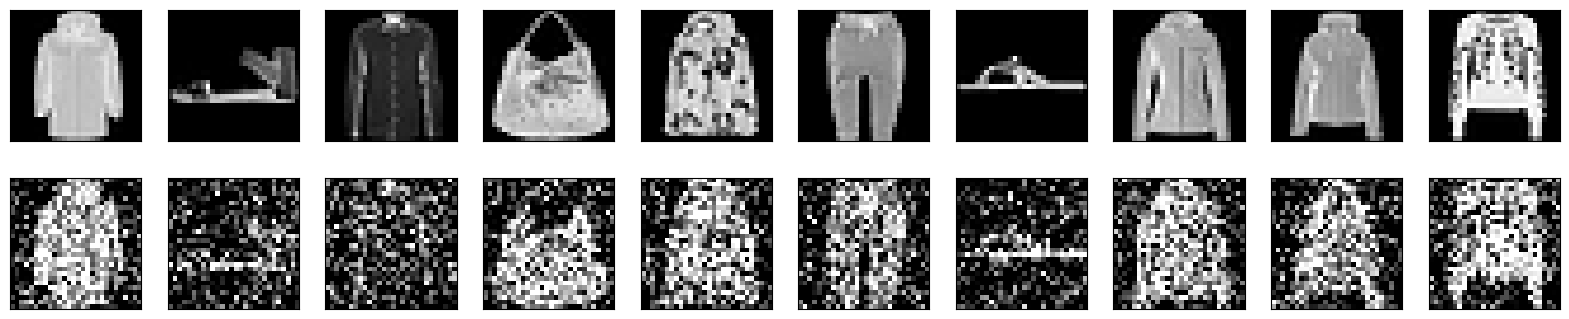

In [77]:
(train_data, _), (test_data, _) = fashion_mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_factor = 0.4

noisy_train_data = noise(train_data,noise_factor)
noisy_test_data = noise(test_data,noise_factor)

display(train_data, noisy_train_data)

<font color='blue'> Se debe construir un autoencoder en el que la parte _encoder_ debe contener tres bloques convolucionales como se indica a continuación:

1.   64 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada.
2.   32 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.
3.   16 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.



<font color='blue'> A partir de esta información, los estudiantes deben construir la parte _decoder_ simétrica (mismo número de filtros y dimensiones) y responder las siguientes preguntas:

-  <font color='blue'> ¿Qué tipo de convolución se debe emplear en el _decoder_? ¿Basta con emplear una convolución convencional 2D? Se debe justificar y desarrollar la respuesta.
-  <font color='blue'> ¿Cuál es la función de activación y función de pérdida que se debe emplear a la salida? ¿Por qué?

-  <font color='blue'> Ahora, a la hora de entrenar nuestro autoencoder, ¿cuáles serían las entradas ($X$) y salidas ($y$)? Y en relación con este punto, ¿por qué mencionábamos que los autoencoders son técnicas no supervisadas? ¿Cuáles son las etiquetas anotadas que empleamos?

In [50]:
conv_encoder = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[28, 28, 1]),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=[28, 28,]),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
])

conv_encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
Total params: 23728 (92.69 KB)
Trainable params: 23728 (

Para construir el decoder, tenemos que aumentar la dimensión en cada capa, para ello tenemos dos opciones:
*   Utilizamos capas convolucionales traspuestas
*   Combinamos capas *upsampling* con capas convolucionales

Optaremos por la primera opción:



In [51]:
conv_decoder = keras.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="same", activation='relu', input_shape=[7,7,16]),
    keras.layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=2, padding="same", activation='relu'),
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), padding="same",  activation='sigmoid')
])

conv_decoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        4640      
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 64)        18496     
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 28, 28, 1)         577       
 Transpose)                                                      
                                                                 
Total params: 23713 (92.63 KB)
Trainable params: 23713 (92.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


En la última capa convolucional utilizamos la función de activación sigmoide, para asegurar que la salida se encuentra entre 0 y 1 (al principio del ejercicio, se han normalizado los píxeles a $[0,1]$)

In [52]:
model = keras.Sequential([conv_encoder, conv_decoder])

<font color='blue'> Ahora se debe entrenar el autoencoder empleando _early stopping_, y el número de épocas, tamaño de batch y demás hiperparámetros que se consideren adecuados (justificando siempre, eso sí, las decisiones tomadas: como es habitual, bien sea basándose en la literatura científica y documentación existentes o bien en la experimentación y evidencia empírica a nuestra disposición). En un primer momento, entrenamos con las imágenes sin ruido, para verificar que somos capaces de reconstruir adecuadamente las imágenes originales de entrada. Como conjunto de validación, en este ejercicio, podemos emplear los datos de test.

Las entradas serán las propias imágenes, es decir (`x_train`) y las salidas que esperamos serán las propias imágenes, es decir, `x_train` de nuevo. Es por eso que se trata de una técnica no supervisada, poruqe las etiquetas, es decir, `y_train` no se utilizarán para nada.

Una buena función de pérdida a utilizar será el error cuadrático medio, que medirá la distancia de los píxeles de nuestra imagen reconstruida a la imagen real.

En este caso, probaremos un nuevo optimizador, similar a Adam, para comprobar su funcionamiento.

En cuanto a la búsqueda de hiperparámetros, elegiremos la tasa de aprendizaje más recomendada (0.001) para Adam y Nadam según TensorFlow.

En cuanto al batch size, utilizaremos un valor elevado que se suele usar como es 128, para acelerar el entrenamiento. En caso de observar que los resultados no son buenos en validación disminuiríamos dicho valor.

Por último, como número de épocas, elegiremos un valor elevado, y usaremos early-stop, cuando no se mejore en el conjunto de validación (con 2 épocas de margen).

In [53]:
# A CUBRIR POR EL ALUMNADO
conv_ae = keras.models.clone_model(model)
early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

optimizer = keras.optimizers.Nadam(learning_rate=1e-2)
conv_ae.compile(loss="mse", optimizer=optimizer)
history = conv_ae.fit(train_data, train_data, batch_size= 128, epochs=20, callbacks=[early_stop], validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 11s 16ms/step - loss: 0.0135 - val_loss: 0.0060
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 3/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 5/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 6/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 7/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 8/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 9/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 10/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0032 - val_l

Veamos las curvas de aprendizaje:

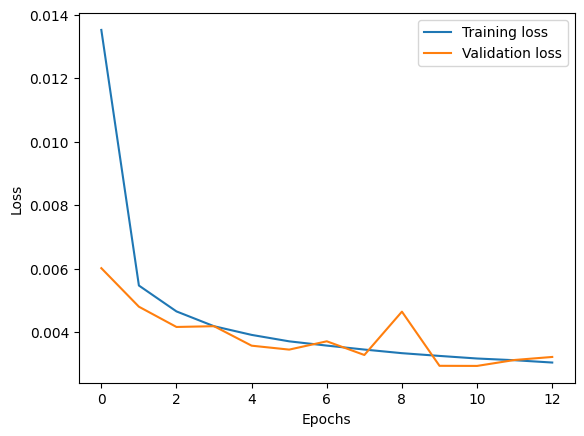

In [54]:
mostrarEvolucion(history, plot_accuracy=False)

Aquí sí resulta sorprendente el hecho de que durante casi todo el entrenamiento, el MSE es menor en la validación.

Comprobamos el error obtenido en validación:

In [55]:
mse = keras.metrics.MeanSquaredError()
mse.update_state(test_data, conv_ae.predict(test_data))

print(f'MSE en test = {mse.result()}')

313/313 [==============================] - 1s 3ms/step
MSE en test = 0.0029545659199357033


El erros es muy pequeño, por lo que las imágenes reconstruidas deben ser muy similares.

Creamos ahora una función para comprobar gráficamente cómo son los resultados:

1/1 [==============================] - 0s 145ms/step


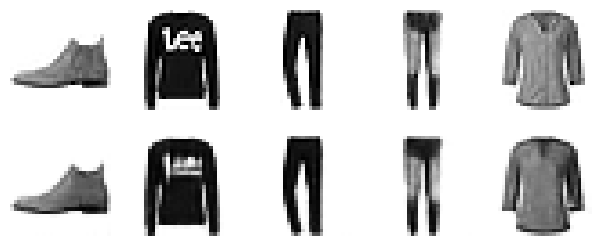

In [56]:
import numpy as np

def plot_reconstructions(model, images=test_data, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")

plot_reconstructions(conv_ae)
plt.show()

La reconstrucción es, tal y como esperábamos, prácticamente perfecta.

<font color='blue'> Ahora vamos a entrenar con las imágenes ruidosas a la entrada y las imágenes sin ruido a la salida. Nuestro propósito es crear un modelo que permita reconstruir a la salida las imágenes sin ruido. Se deben discutir los resultados obtenidos, así como si se percibe alguna diferencia entre las curvas de entrenamiento cuando se emplean imágenes con y sin ruido.

In [78]:
# A CUBRIR POR EL ALUMNADO
conv_ae_noise = keras.models.clone_model(model)

early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

optimizer = keras.optimizers.Nadam(learning_rate=1e-2)
conv_ae_noise.compile(loss="mse", optimizer=optimizer)
history = conv_ae_noise.fit(noisy_train_data, train_data, batch_size= 128, epochs=20, callbacks=[early_stop], validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 8s 16ms/step - loss: 0.0241 - val_loss: 0.0142
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0140 - val_loss: 0.0135
Epoch 3/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0134 - val_loss: 0.0130
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0131 - val_loss: 0.0135
Epoch 5/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 6/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0128 - val_loss: 0.0126
Epoch 7/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0126 - val_loss: 0.0128
Epoch 8/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 9/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0124 - val_loss: 0.0125
Epoch 10/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0124 - val_lo

Veamos las curvas de aprendizaje:

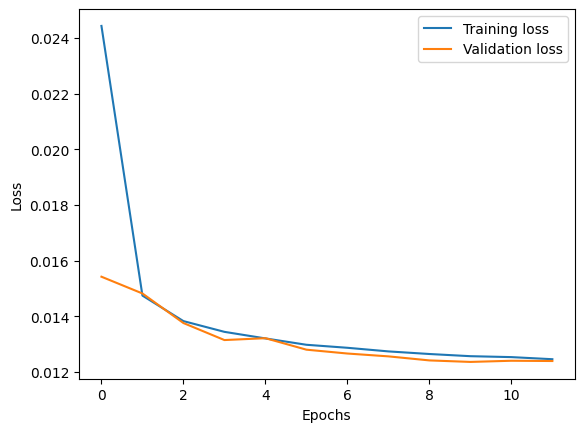

In [58]:
mostrarEvolucion(history, plot_accuracy=False)

En este caso, el error es más elevado que el caso anterior, ya que aquí no hay que simplemente obtener la misma imagen que en la entrada; ahora la imagen tiene cierto ruido.
Comprobemos el error en el conjunto de validación:

In [79]:
mse = keras.metrics.MeanSquaredError()
mse.update_state(test_data, conv_ae_noise.predict(noisy_test_data))

print(f'MSE en test = {mse.result()}')

313/313 [==============================] - 1s 2ms/step
MSE en test = 0.012272868305444717


El error sigue siendo bastante bajo, incluso siendo una tarea aparentemente mucho más complicada.
Gráficamente:

1/1 [==============================] - 0s 17ms/step


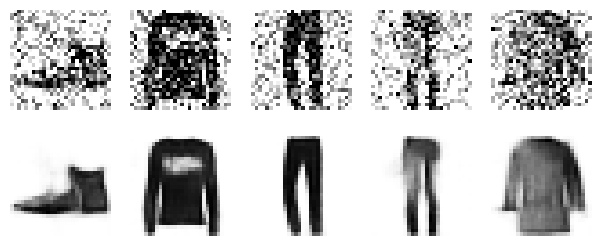

In [80]:
plot_reconstructions(conv_ae_noise, images=noisy_test_data)
plt.show()

Los resultados resultan muy sorprendentes. De imágenes en las que prácticamente no se aprecia nada, obtenemos el objeto de forma bastante clara.

<font color='blue'> Finalmente, se deben realizar dos experimentos.  

1.   Por un lado, probar con distintos `noise_factor` progresivamente más severos de ruido, para comprobar si hay algún límite (_breakpoint_) a partir del cual la reconstrucción de las imágenes ruidosas se resiente. En otras palabras, queremos estudiar hasta qué grado de ruidosidad podemos reconstruir nuestras imágenes contaminadas con ruido.
2.   Por otro lado, debemos investigar si el autoencoder entrenado generaliza y permite reconstruir imágenes en presencia de ruido diferente. Sin realizar ningún otro entrenamiento, y empleando el autoencoder ya entrenado, ¿podemos reconstruir las imágenes contaminadas con este otro tipo de ruido? Para simular dicho ruido se debe emplear la función que se proporciona más abajo (`noise2()`), aunque se da libertad al alumnado para experimentar también con otros tipos de ruido. ¿Qué conclusiones se pueden extraer de este experimento?



In [61]:
def noise2(image, noise_factor):
    noisy_array = image.copy()
    probs = np.random.random(noisy_array.shape[:2])
    noisy_array[probs < noise_factor/2] = 0.0
    noisy_array[probs > 1 - (noise_factor/2)] = 1.0
    return np.clip(noisy_array, 0.0, 1.0)

#### 2.1 - Experimentando con distintos factores de ruido

Probaremos con varios factores de ruido, desde $0.2$ (imágenes prácticamente sin ruido) hasta $0.8$ (imágenes en las que apenas se aprecia nada). Entrenaremos en cada caso una red neuronal:

In [62]:
noise_factors = [0.4,0.6,0.8, 0.9]

Un ejemplo de las imágenes con 0.4 de ruido serían las siguientes:

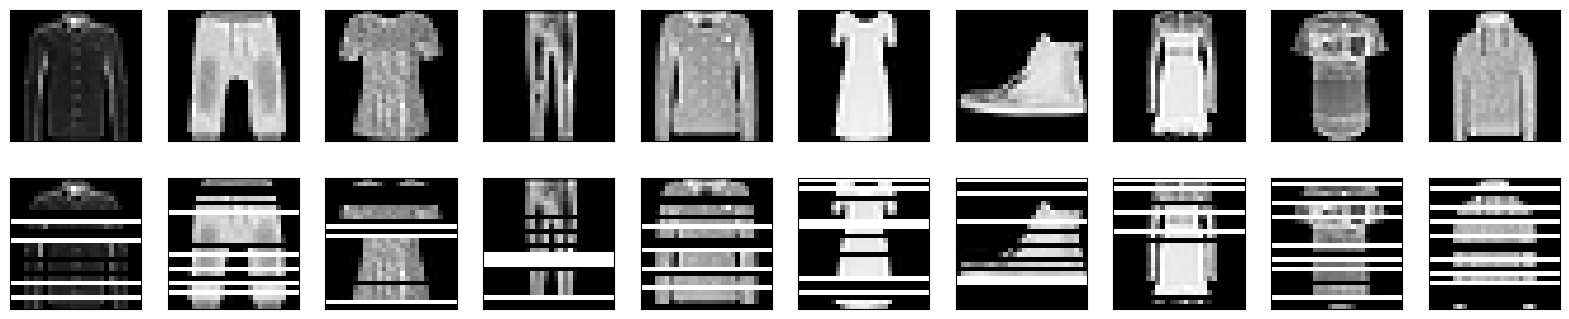

In [63]:
noise_factor = 0.4
noisy_test_data = noise2(test_data,noise_factor)
display(test_data, noisy_test_data)

Y con $0.9$ sería:

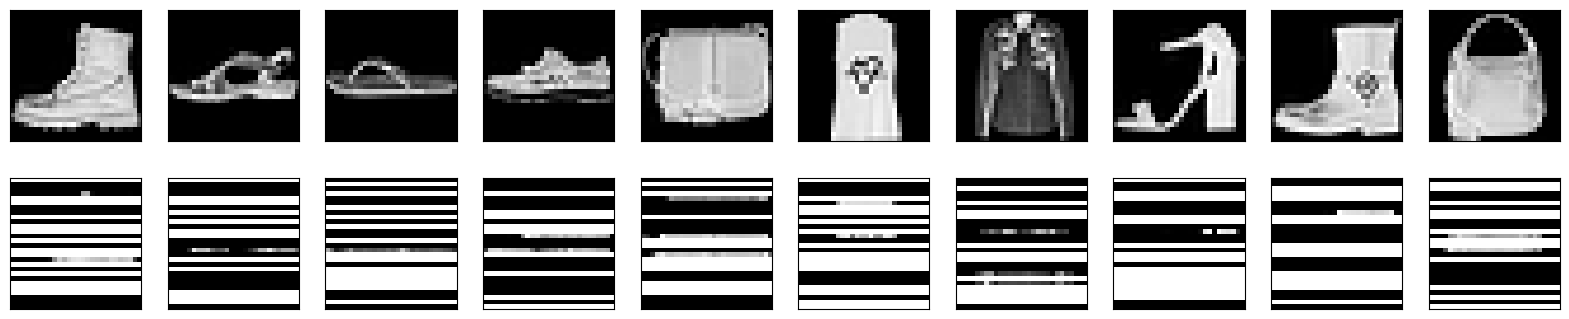

In [64]:
noise_factor = 0.9
noisy_test_data = noise2(test_data,noise_factor)
display(test_data, noisy_test_data)

, que son imágenes que ni siquiera un humano podría reconstruir.

In [65]:
def aecnnresults(train_data, test_data, noise_factor):
  # Obtenemos el entrenamiento y test con ruido
  noisy_train_data = noise2(train_data,noise_factor)
  noisy_test_data = noise2(test_data,noise_factor)

  # Entrenamos el autoencoder
  conv_ae_noise2 = keras.models.clone_model(model)
  early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

  optimizer = keras.optimizers.Nadam(learning_rate=1e-2)
  conv_ae_noise2.compile(loss="mse", optimizer=optimizer)
  conv_ae_noise2.fit(noisy_train_data, train_data, batch_size= 128, epochs=20, callbacks=[early_stop], validation_split=0.2)

  print("")
  mse = keras.metrics.MeanSquaredError()
  mse.update_state(test_data, conv_ae_noise2.predict(noisy_test_data))

  print("")
  plot_reconstructions(conv_ae_noise2, images=noisy_test_data)

  print("")
  print(f'MSE en test = {mse.result()}')

Comenzamos con $0.4$:

Epoch 1/20
375/375 [==============================] - 8s 15ms/step - loss: 0.0309 - val_loss: 0.0178
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0151 - val_loss: 0.0131
Epoch 3/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0130 - val_loss: 0.0133
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 5/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0114 - val_loss: 0.0112
Epoch 6/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 7/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0109 - val_loss: 0.0112
Epoch 8/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 9/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 10/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0103 - val_lo

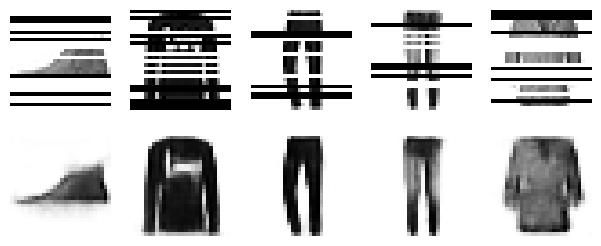

In [66]:
noise_factor = noise_factors[0]
aecnnresults(train_data, test_data, noise_factor)

El modelo sigue funcionando muy bien y las imágenes obtenidas están bastante bien reconstruidas. Pasamos a probar con $0.6$, imágenes ya poco visibles:

Epoch 1/20
375/375 [==============================] - 8s 16ms/step - loss: 0.0418 - val_loss: 0.0238
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0243 - val_loss: 0.0208
Epoch 3/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0204 - val_loss: 0.0188
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0197 - val_loss: 0.0200
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0182 - val_loss: 0.0184
Epoch 6/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0183 - val_loss: 0.0176
Epoch 7/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0176 - val_loss: 0.0178
Epoch 8/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0172 - val_loss: 0.0185

313/313 [==============================] - 1s 2ms/step

1/1 [==============================] - 0s 17ms/step

MSE en test = 0.017605390399694443


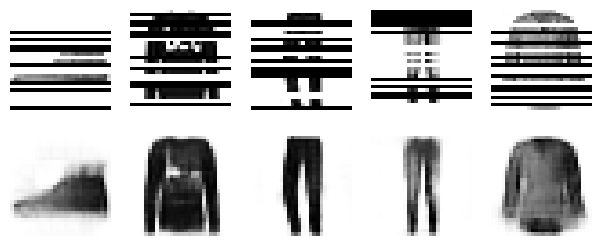

In [67]:
noise_factor = noise_factors[1]
aecnnresults(train_data, test_data, noise_factor)

Comienza a ser increíble la reconstrucción que realiza el autoencoder de las imágenes. Prácticamente no se aprecia nada en las imágenes con ruido, y aun así el modelo obtiene una reconstrucción muy buena de las imágenes. Veamos ya si con $0.8$ el error aumenta más:

Epoch 1/20
375/375 [==============================] - 8s 16ms/step - loss: 0.0588 - val_loss: 0.0407
Epoch 2/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0409 - val_loss: 0.0378
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0371 - val_loss: 0.0363
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0364 - val_loss: 0.0351
Epoch 5/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0349 - val_loss: 0.0460
Epoch 6/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0357 - val_loss: 0.0402

313/313 [==============================] - 1s 2ms/step

1/1 [==============================] - 0s 18ms/step

MSE en test = 0.03522998467087746


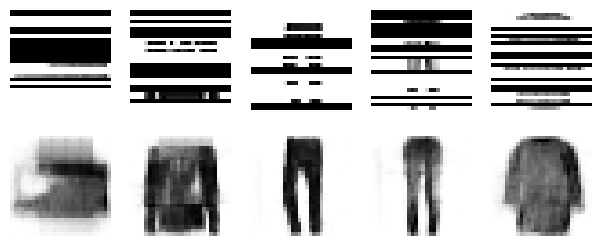

In [68]:
noise_factor = noise_factors[2]
aecnnresults(train_data, test_data, noise_factor)

Ya en algunas imágenes sí se aprecia que el modelo comete bastante error, como en la primera bota. El error aumenta bastante en comparación a la anterior, pero el modelo sigue pudiendo reconstruir ciertas imágenes. Pasamos ya por último a $0.9$:

Epoch 1/20
375/375 [==============================] - 8s 15ms/step - loss: 0.0775 - val_loss: 0.0618
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0605 - val_loss: 0.0577
Epoch 3/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0578 - val_loss: 0.0560
Epoch 4/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0558 - val_loss: 0.0552
Epoch 5/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0549 - val_loss: 0.0538
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0542 - val_loss: 0.0536
Epoch 7/20
375/375 [==============================] - 7s 17ms/step - loss: 0.0531 - val_loss: 0.0523
Epoch 8/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0523 - val_loss: 0.0518
Epoch 9/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0527 - val_loss: 0.0513
Epoch 10/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0543 - val_lo

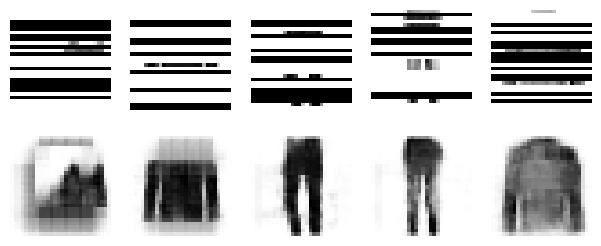

In [69]:
noise_factor = noise_factors[3]
aecnnresults(train_data, test_data, noise_factor)

A pesar de la gran cantidad de ruido de las imágenes, sigue pudiendo eliminar el ruido en muchas imágenes. Sin embargo, es cierto que hay imágenes como la primera, en las que comete mucho error.

Concluimos, que el modelo funciona con todos los umbrales de ruido, en las que se aprecie alguna parte de la imagen (obviamente, si el factor es 1, la imagen no será visible y el modelo no funcionará). Resulta muy sorprendente esta conclusión.

#### 2.2 - ¿Generalizan bien los modelos a distintos factores de ruido?

Ante esta pregunta, lo más razonable sería pensar que si un modelo se entrena con mucho ruido, al probarlo con datos con menor ruido el modelo debería seguir funcionando correctamente. Comprobemos si es cierto, entrenando un modelo con `noise_factor = 0.8`, y validándolo con datos con menor ruido.


In [70]:
# A CUBRIR POR EL ALUMNADO
noise_factor = 0.8

# Obtenemos el entrenamiento y test con ruido
noisy_train_data = noise2(train_data,noise_factor)
noisy_test_data = noise2(test_data,noise_factor)

# Entrenamos el autoencoder
conv_ae_noise3 = keras.models.clone_model(model)

early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)

optimizer = keras.optimizers.Nadam(learning_rate=1e-2)
conv_ae_noise3.compile(loss="mse", optimizer=optimizer)
conv_ae_noise3.fit(noisy_train_data, train_data, batch_size= 128, epochs=20, callbacks=[early_stop], validation_split=0.2)

print("")
mse = keras.metrics.MeanSquaredError()
mse.update_state(test_data, conv_ae_noise3.predict(noisy_test_data))

print("")
print(f'MSE en test = {mse.result()}')


Epoch 1/20
375/375 [==============================] - 9s 16ms/step - loss: 0.0642 - val_loss: 0.0508
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0421 - val_loss: 0.0382
Epoch 3/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0384 - val_loss: 0.0364
Epoch 4/20
375/375 [==============================] - 5s 15ms/step - loss: 0.0383 - val_loss: 0.0356
Epoch 5/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0353 - val_loss: 0.0355
Epoch 6/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0373 - val_loss: 0.0356
Epoch 7/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0359 - val_loss: 0.0349
Epoch 8/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0345 - val_loss: 0.0340
Epoch 9/20
375/375 [==============================] - 6s 15ms/step - loss: 0.0397 - val_loss: 0.0391
Epoch 10/20
375/375 [==============================] - 5s 15ms/step - loss: 0.0368 - val_lo

El modelo funciona correctamente en datos con el mismo ruido que con los que se ha entrenado, eso ya lo sabíamos. Probamos ahora datos con menor ruido:

In [71]:
noisy_test_data = noise2(test_data,0.6)
mse.update_state(test_data, conv_ae_noise3.predict(noisy_test_data))
print(f'MSE en test = {mse.result()}')

313/313 [==============================] - 1s 2ms/step
MSE en test = 0.027180003002285957


y se obtiene un error, incluso más reducido que en el test original (con 0.8 de ruido), lo cual indica que el modelo generaliza bastante bien. Veámoslo gráficamente:

1/1 [==============================] - 0s 17ms/step


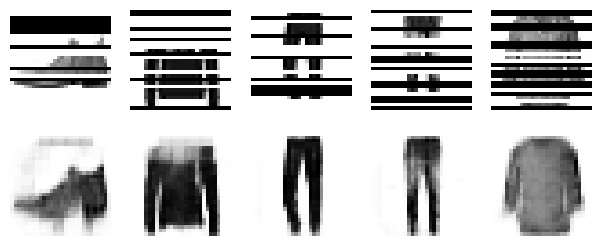

In [72]:
plot_reconstructions(conv_ae_noise3, images=noisy_test_data)

Veamos si con un ruido aun menor mejora aun más el modelo:

313/313 [==============================] - 1s 2ms/step
MSE en test = 0.023567743599414825
1/1 [==============================] - 0s 21ms/step


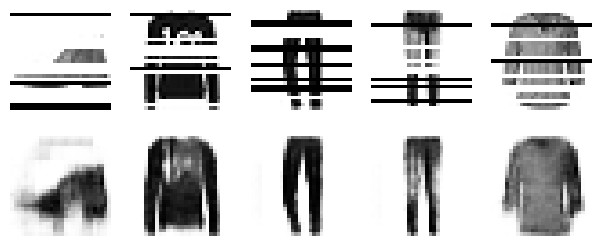

In [73]:
noisy_test_data = noise2(test_data,0.4)
mse.update_state(test_data, conv_ae_noise3.predict(noisy_test_data))
print(f'MSE en test = {mse.result()}')

plot_reconstructions(conv_ae_noise3, images=noisy_test_data)

El error vuelve a disminuir. Por último probamos con $0.2$:

313/313 [==============================] - 1s 2ms/step
MSE en test = 0.021397724747657776
1/1 [==============================] - 0s 18ms/step


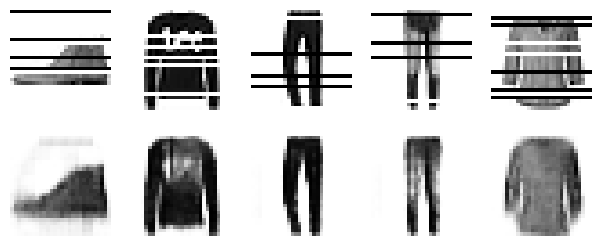

In [74]:
noisy_test_data = noise2(test_data,0.2)
mse.update_state(test_data, conv_ae_noise3.predict(noisy_test_data))
print(f'MSE en test = {mse.result()}')

plot_reconstructions(conv_ae_noise3, images=noisy_test_data)

El modelo se sigue comportando muy bien.

Es decir, la conclusión principal es que podemos entrenar el modelo con un ruido elevado, y aplicar el modelo a las imágenes que nos lleguen con ruido, incluso sin ni siquiera saber el ruido que tienen, generalizando nuestro modelo a muchas más situaciones.